## 여러 개의 데이터 프레임을 하나로 합치기
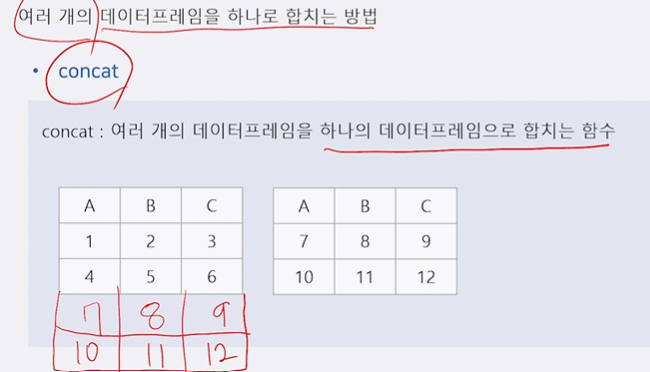

## Concat  
- 기본구조 : pd.concat([df1,df2,])  
- 주의점 : 열 이름과, 인덱스 이름이 맞지 않다면 na값을 생성해 그래프를 합치기도 한다.

In [ ]:
import pandas as pd

In [ ]:
# 열 이름을 기준으로 합치기
pd.concat([df1,df2,])
# 행을 기준으로 합치기
pd.concat([df1,df2,],axis=1) # 1일때 열 방향 -> , 0일때 행 방향 ⇣
# 행 이름 바꾸기
df.index=['~']
# 열 이름 바꾸기
df.columns=['~'.]

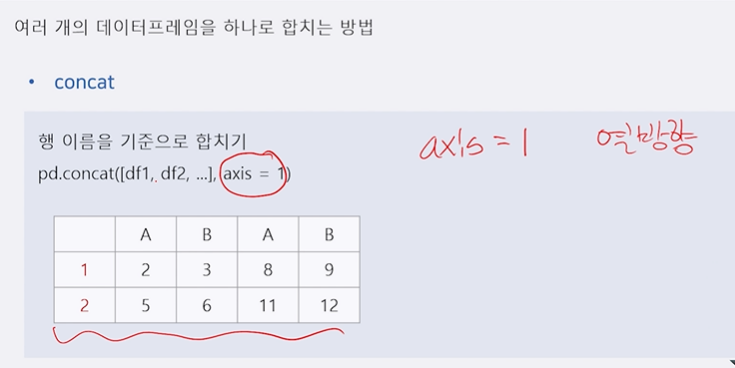

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 실습
df1=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/concat_1.csv')
df2=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/concat_2.csv')
df3=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/concat_3.csv')

pd.concat([df1,df2,df3],ignore_index=True) #열 이름을 기준으로 데이터프레임 합치기
#ignore_index: 인덱스 이름 무시하기


In [ ]:
pd.concat([df1,df2,df3],axis=1) #행 이름을 기준으로 데이터프레임 합치기

## Merge
- 특정 열을 기준으로 데이터 프레임을 합치는 방법
- 기분구조: df1.merge(df2,left_on=df1의 기준열, right_on=df2의 기준열)  
ex.  
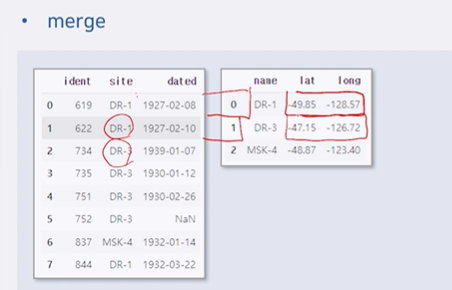

In [ ]:
# 날씨 정보
site=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/survey_site.csv')
person=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/survey_person.csv')
survey=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/survey_survey.csv')
visit=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/survey_visited.csv')

In [ ]:
person

In [ ]:
survey

In [ ]:
visit

In [ ]:
site

In [ ]:
df2=visit.merge(site,left_on='site',right_on='name')
df2=df2.merge(survey,left_on='ident',right_on='taken')
df2.merge(person,left_on='person',right_on='ident')
del df2['name']
del df2['taken']
del df2['ident']

df2

In [ ]:
df2.columns

## 누락값 처리하기  
- 누락값: 누락값이랑 NA 비어있는 값을 말한다.  
- 누락값이 하나라도 있다면 데이터분석 및 연산이 원활하지 못할 수 있다.  
- pd.isnull(): 누락값이면 True, 아니면 False  
- pd.notnull(): 누락값이 아니면 True, 아니면 False  
- 주의점 : 누락값은 비교할 수 없다  
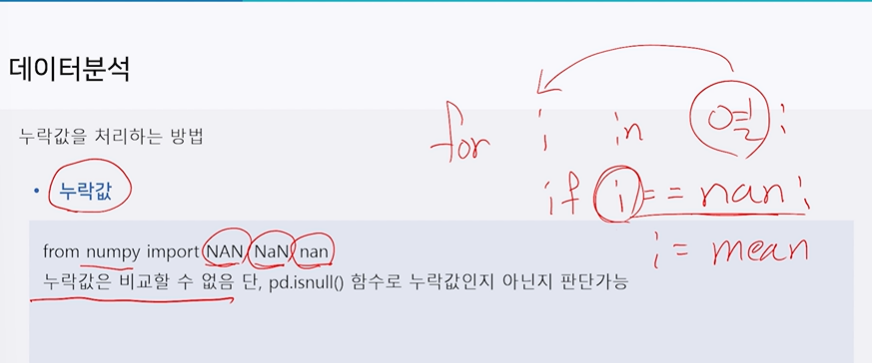  
- if문을 가지고 nan의 참 거짓을 확인할 수 없다.

In [ ]:
# 누락값 개수 구하기
import numpy as np

df2.count() #데이터 개수 구하기
np.count_nonzero(df2.isnull())
df2['site'].value_counts(dropna=False)

# 누락값 채우기 - .fillna(값)
# .fillna(method='ffill') 앞에 값으로 누락값 채우기
# .fillna(method='bfill') 뒤에 값으로 누락값 채우기
# df.interpolate() 흐름에 따라 결측치를 채워주는
#-> 컴퓨터가 데이터의 흐름을 스스로 판단해 결측치를 채움


In [ ]:
ebola=pd.read_csv('/content/drive/MyDrive/Github/Python/실습 데이터_데이터 분석 기초/country_timeseries.csv')
ebola

In [ ]:
ebola.count()-122 # 결측치 확인
# 시계열 데이터에서는 결측값을 평균으로 채우면 안된다
ebola.fillna(method='ffill')  # 앞에 값으로 결측치 채우기 , 앞에 가져올 값이 없으면 그대로 nan
ebola.fillna(method='bfill')  # 뒤에 값으로 결측치 채우기 , 뒤에 가져올 값이 없으면 그대로 nan
ebola.interpolate() #컴퓨터가 흐름을 파악해 결측치 채우기, 흐름을 모르는 값은 na 그대로

# 실무에서 결측치 해결하는 방법
ebola2=ebola.interpolate() #데이터 흐름에 맞게 결측치를 한번 채우고 새로운 변수에 값을 할당
ebola2=ebola2.fillna(method='ffill')
ebola2=ebola2.fillna(method='bfill')
ebola2.info() #결측치가 다 채워져 있는 것을 확인 가능

In [ ]:
from numpy import nan
dates=['12/1/2016','12/3/2016','12/4/2016','12/10/2016']
date=pd.to_datetime(dates) # dates 문자값들을 날짜 값으로 변환

s=pd.Series([1,nan,nan,10],index=date)
s

In [ ]:
s.interpolate()
#값을 확인해보니 데이터 흐름에 따라 결측치 채우는 것을 확인
#하지만 데이터의 흐름보다 시간의 흐름에 따라 결측치를 채우는 것이 더 알맞다고 생각
s.interpolate(method='time') #시간의 흐름에 따라 결측치 채우는